## Inhibition Curve Generator 
#### Generate theoretical data for desired serial dilution ratio given LogIC50, Hillslope, Top, and Bottom for a known inhibition curve
##### How to use this notebook:

- Change **startConc** to desired starting concentration. 
- Change **nDilutions** to number of dilutions required.
- Change **dilution** to desired dilution ratio (i.e dilution = 2 gives a 1:2 serial dilution)
- Change **bottom** to minimum point of known inhibition curve
- Change **top** to maximum point of a known inhibition curve
- Change **logIC50** to LogIC50 of a known inhibition curve
- Change **hillSlope** to HillSlope of a known inhibition curve





In [135]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Change values here

In [136]:
startConc = 1000
nDilutions = 10
dilution = 2

bottom = 22.33 
top = 101.1 
logIC50 = 4.286 
hillSlope = -1.795 

## Equations Used
###### Transform X
$x = Log_{10}(x)$ 
```python
def logDilution(x):
    return(np.log10(x))
```

###### Inhibition Response 
$y = \frac{Bottom + (Top - Bottom)}{1 + 10^{(LogIC_{50}-x) * HillSlope}}$
```python
def inhibition(concentration, bottom, top, logIC50,hillSlope):
    return bottom + (top - bottom)/(1+np.power(10,((logIC50-concentration) * hillSlope)))
```

In [137]:
#convert to log
def logDilution(x):
    return(np.log10(x))

#calculate response
def inhibition(concentration, bottom, top, logIC50,hillSlope):
    return bottom + (top - bottom)/(1+np.power(10,((logIC50-concentration) * hillSlope)))

##### Flow of following code segment:
1. Create a 1xN array of serial dilutions starting from first concentration 
2. Transform serial dilutions into $Log_{10}(x)$
3. Calculate inhibition response for every transformed serial dilution

In [138]:
pdData2 =pd.DataFrame(data = {'Dilution_Factor': startConc*np.power(dilution, range(nDilutions))})
pdData2['logx'] = logDilution(pdData2.Dilution_Factor)
pdData2['response'] = pdData2.logx.apply(lambda x: inhibition(x,bottom,top,logIC50,hillSlope))

In [139]:
HTML(pdData2.to_html())

,Dilution_Factor,logx,response
0,1000,3.00000,100.714645
1,2000,3.30103,99.778725
2,4000,3.60206,96.697390
3,8000,3.90309,87.675651
4,16000,4.20412,68.316482
5,32000,4.50515,45.005098
6,64000,4.80618,30.548341
7,128000,5.10721,24.888290
8,256000,5.40824,23.084674
9,512000,5.70927,22.548969


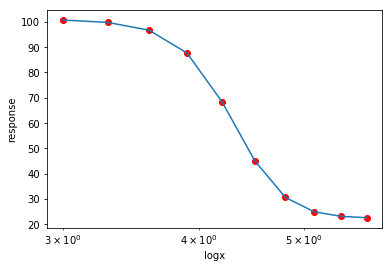

In [140]:
plt.plot(pdData2.logx, pdData2.response, 'ro')
plt.plot(pdData2.logx, pdData2.response)
plt.xscale('log')
plt.xlabel('logx')
plt.ylabel('response')
plt.show()